In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20fe35d9dd8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Climate Analysis

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


stn1_list = []
# Calculate the date 1 year ago from the last data point in the database
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)

station1_past_year = session.query(Measurement.date,Measurement.prcp,Measurement.id,Measurement.tobs,Measurement.station).\
    filter(Measurement.date >= previous_year).order_by(Measurement.date.asc()).all()
for row in station1_past_year:
    stn1_list.append(row)
    print(row)

('2016-08-23', 0.0, 2364, 81.0, 'USC00519397')
('2016-08-23', 0.15, 5091, 76.0, 'USC00513117')
('2016-08-23', 0.05, 7331, 80.0, 'USC00514830')
('2016-08-23', None, 8825, 80.0, 'USC00517948')
('2016-08-23', 0.02, 11851, 80.0, 'USC00519523')
('2016-08-23', 1.79, 14608, 77.0, 'USC00519281')
('2016-08-23', 0.7, 19202, 74.0, 'USC00516128')
('2016-08-24', 0.08, 2365, 79.0, 'USC00519397')
('2016-08-24', 2.15, 5092, 76.0, 'USC00513117')
('2016-08-24', 2.28, 7332, 80.0, 'USC00514830')
('2016-08-24', None, 8826, 78.0, 'USC00517948')
('2016-08-24', 1.22, 11852, 79.0, 'USC00519523')
('2016-08-24', 2.15, 14609, 77.0, 'USC00519281')
('2016-08-24', 1.45, 19203, 74.0, 'USC00516128')
('2016-08-25', 0.08, 2366, 80.0, 'USC00519397')
('2016-08-25', 0.08, 5093, 77.0, 'USC00513117')
('2016-08-25', 0.0, 7333, 81.0, 'USC00514830')
('2016-08-25', 0.0, 8827, 81.0, 'USC00517948')
('2016-08-25', 0.21, 11853, 80.0, 'USC00519523')
('2016-08-25', 0.06, 14610, 80.0, 'USC00519281')
('2016-08-25', 0.11, 19204, 77.0, 'U

('2017-07-25', 0.0, 9003, 81.0, 'USC00517948')
('2017-07-25', 0.05, 12162, 80.0, 'USC00519523')
('2017-07-25', 0.11, 14944, 77.0, 'USC00519281')
('2017-07-25', 0.3, 19522, 79.0, 'USC00516128')
('2017-07-26', 0.0, 2698, 82.0, 'USC00519397')
('2017-07-26', 0.06, 5428, 78.0, 'USC00513117')
('2017-07-26', 0.02, 7611, 79.0, 'USC00514830')
('2017-07-26', None, 9004, 78.0, 'USC00517948')
('2017-07-26', 0.0, 12163, 84.0, 'USC00519523')
('2017-07-26', 0.12, 14945, 75.0, 'USC00519281')
('2017-07-26', 0.3, 19523, 73.0, 'USC00516128')
('2017-07-27', 0.0, 2699, 79.0, 'USC00519397')
('2017-07-27', 0.0, 5429, 77.0, 'USC00513117')
('2017-07-27', 0.0, 7612, 80.0, 'USC00514830')
('2017-07-27', None, 9005, 79.0, 'USC00517948')
('2017-07-27', 0.0, 12164, 80.0, 'USC00519523')
('2017-07-27', 0.01, 14946, 76.0, 'USC00519281')
('2017-07-27', 0.0, 19524, 75.0, 'USC00516128')
('2017-07-28', 0.0, 2700, 81.0, 'USC00519397')
('2017-07-28', 0.13, 5430, 77.0, 'USC00513117')
('2017-07-28', 0.14, 7613, 81.0, 'USC00514

In [34]:
# After determining the latest date, used a limit to display 1 year (365 days)
# Used index to determine the date of 1 year prior
prev_year = station1_past_year[-1][0] 
print(prev_year)
    

2017-08-23


In [32]:
# #pd.read_sql test

# stmt = session.query(stn1_list).statement
# print(stmt)
# df = pd.read_sql_query(stmt,session.bind)
# df.head(10)

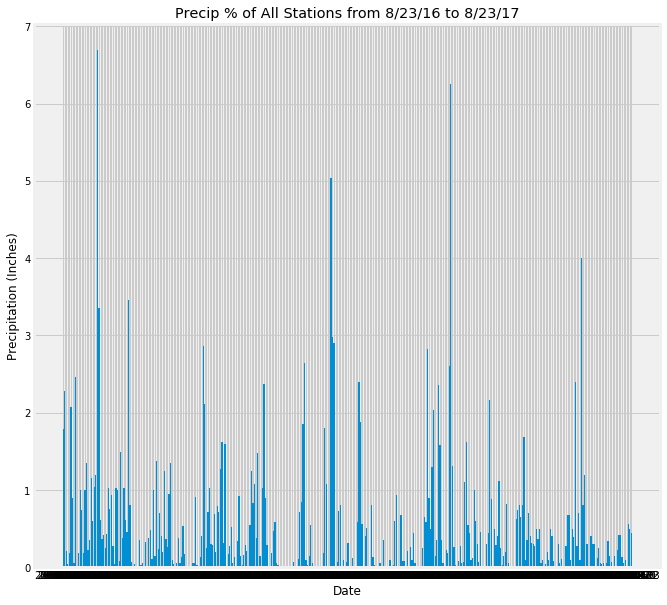

In [35]:
#revisit

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize=(10,10))

stn1_df = pd.DataFrame(stn1_list)
#stn1_df = stn1_df.set_index('date')
plt.title("Precip % of All Stations from 8/23/16 to 8/23/17")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.bar(stn1_df['date'],stn1_df['prcp'])


plt.show()

#stn1_df.head()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

stats = pd.DataFrame(stn1_list)
stats.describe()

,prcp,id,tobs
count,2021.000000,2230.000000,2230.000000
mean,0.177279,10158.570404,74.590583
std,0.461190,5603.500203,4.611667
min,0.000000,2364.000000,58.000000
25%,0.000000,5287.250000,72.000000
50%,0.020000,8930.500000,75.000000
75%,0.130000,14750.750000,78.000000
max,6.700000,19550.000000,87.000000


In [17]:
# Design a query to show how many stations are available in this dataset?

station_query = session.query(Measurement.station).group_by(Measurement.station).all()
print(station_query)

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_count = session.query((Measurement.station),func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?



min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print("Lowest temp is" + str(min_temp[0]))
print("Max temp is" + str (max_temp))
print("Average temp is" + str(avg_temp))




Lowest temp is(54.0,)
Max temp is[(85.0,)]
Average temp is[(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

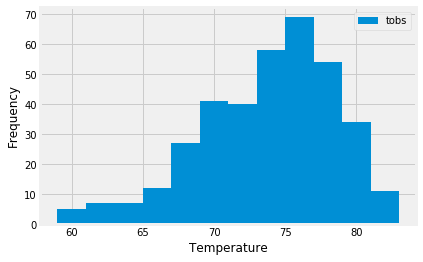

In [20]:
active_stn=[]

# Choose the station with the highest number of temperature observations.
station_tobs_count = session.query((Measurement.station),func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()
station_tobs_count

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_stn_past_year = session.query(Measurement.date,Measurement.prcp,Measurement.id,Measurement.tobs,Measurement.station).\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).limit(365)

for row in active_stn_past_year:
    active_stn.append(row)

active_stn_df = pd.DataFrame(active_stn)

active_tobs = active_stn_df[['date','tobs']]
active_tobs.plot.hist(bins =12)
plt.xlabel("Temperature")



## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
